In [172]:
import numpy as np # linear algebra
import pandas as pd # data processing
import time
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import accuracy_score


## Read Data

In [173]:
data_name = "dummy"
# data_name = "dummy_object"
df = pd.read_csv(f"../datasets/data_{data_name}_eco.csv")
df_copy = df.copy()
df_copy.head()

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Departure/Arrival time convenient_0,Departure/Arrival time convenient_1,Departure/Arrival time convenient_2,Departure/Arrival time convenient_3,...,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Eco,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,1,26,1180,0,0.0,neutral or dissatisfied
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,1,47,1276,9,23.0,neutral or dissatisfied
2,0,0,0,1,0,0,0,0,0,1,...,0,1,1,0,1,20,1061,0,0.0,neutral or dissatisfied
3,0,0,0,0,1,0,0,0,0,0,...,0,1,1,0,1,24,1182,0,0.0,neutral or dissatisfied
4,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,1,53,834,28,8.0,neutral or dissatisfied


<Axes: xlabel='satisfaction', ylabel='count'>

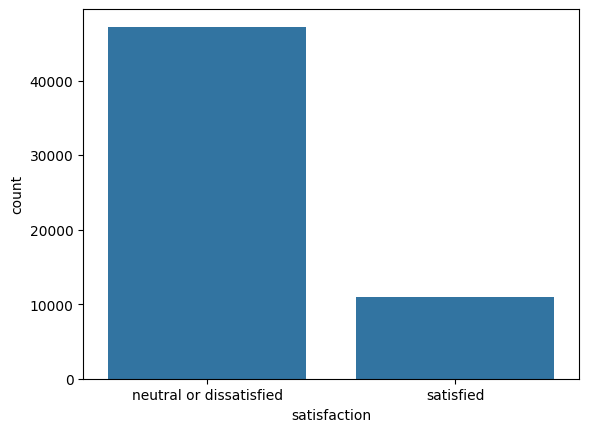

In [174]:
import seaborn as sns
sns.countplot(x="satisfaction", data=df_copy)

Before Counter({'neutral or dissatisfied': 47215, 'satisfied': 10902})
After Counter({'neutral or dissatisfied': 47215, 'satisfied': 47215})


<Axes: xlabel='count', ylabel='satisfaction'>

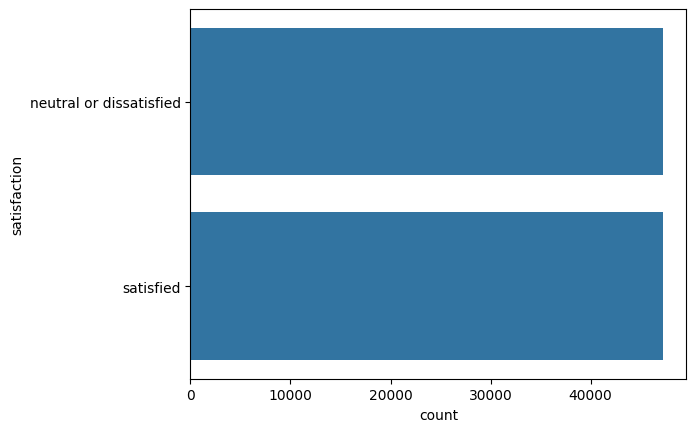

In [175]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(df["satisfaction"])
print('Before', counter)

# oversampling the train dataset using SMOTE
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(df_copy.iloc[:,:-1], df["satisfaction"])

counter = Counter(y_train_sm)
print('After', counter)

sns.countplot(data=y_train_sm)

## Train-Test Splitting

In [176]:
X= df_copy.iloc[:,:-1]
X

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Departure/Arrival time convenient_0,Departure/Arrival time convenient_1,Departure/Arrival time convenient_2,Departure/Arrival time convenient_3,...,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Eco,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,1,26,1180,0,0.0
1,0,0,1,0,0,0,0,0,0,0,...,1,1,0,0,1,1,47,1276,9,23.0
2,0,0,0,1,0,0,0,0,0,1,...,1,0,1,1,0,1,20,1061,0,0.0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,1,24,1182,0,0.0
4,0,1,0,0,0,0,0,0,0,0,...,1,1,0,1,0,1,53,834,28,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58112,0,0,0,0,1,0,0,0,0,0,...,1,0,1,1,0,1,42,1024,0,17.0
58113,0,0,1,0,0,0,0,0,1,0,...,1,1,0,1,0,1,41,692,15,3.0
58114,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,36,432,0,0.0
58115,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,1,17,828,0,0.0


In [177]:
y = df_copy.iloc[:,-1]
y

0        neutral or dissatisfied
1        neutral or dissatisfied
2        neutral or dissatisfied
3        neutral or dissatisfied
4        neutral or dissatisfied
                  ...           
58112    neutral or dissatisfied
58113    neutral or dissatisfied
58114    neutral or dissatisfied
58115    neutral or dissatisfied
58116    neutral or dissatisfied
Name: satisfaction, Length: 58117, dtype: object

In [178]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_train_sm,y_train_sm,test_size=0.3,random_state=42)
print(f"Shape of training set is : {X_train.shape} and test set is :{X_test.shape}" )

Shape of training set is : (66101, 89) and test set is :(28329, 89)


In [179]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train

array([[-0.14219303, -0.33751721, -0.45450513, ...,  2.70868715,
        -0.33522893, -0.36964541],
       [-0.14219303, -0.33751721, -0.45450513, ...,  0.53405112,
         0.16189623, -0.36964541],
       [-0.14219303, -0.33751721, -0.45450513, ...,  0.54146676,
        -0.36284699, -0.36964541],
       ...,
       [-0.14219303, -0.33751721, -0.45450513, ..., -1.21233177,
        -0.36284699, -0.33880988],
       [-0.14219303, -0.33751721, -0.45450513, ...,  1.31083927,
        -0.36284699, -0.36964541],
       [-0.14219303, -0.33751721,  2.20019519, ...,  3.45766665,
        -0.36284699, -0.206641  ]])

## Set paramiter CV

In [180]:
# ทำ Cross Validation
k_folds = 15  # จำนวน k-folds 

## K-NN(K Nearest Neighbours)

In [181]:
from sklearn.neighbors import KNeighborsClassifier

model_knn=KNeighborsClassifier(n_neighbors=5)

#fit the model with trained data
start_time = time.time()  # เวลาเริ่มต้น
model_knn.fit(X_train,y_train)
end_time = time.time()  # เวลาสิ้นสุด

# คำนวณเวลาที่ใช้ในการฝึกโมเดล
training_time_KNN = end_time - start_time
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_KNN:.6f} วินาที")


เวลาที่ใช้ในการฝึกโมเดล: 0.106663 วินาที


In [182]:

#Predict the accuracy of the model
y_pred_knn=model_knn.predict(X_test)

accuracy_KNN=accuracy_score(y_pred_knn,y_test)
print(f"Accuracy of Knn is : {round(accuracy_KNN*100,2)} % .")

report=classification_report(y_test,y_pred_knn)
print("Classification Report is : \n",report)

Accuracy of Knn is : 95.13 % .
Classification Report is : 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.96      0.95     14085
              satisfied       0.96      0.95      0.95     14244

               accuracy                           0.95     28329
              macro avg       0.95      0.95      0.95     28329
           weighted avg       0.95      0.95      0.95     28329



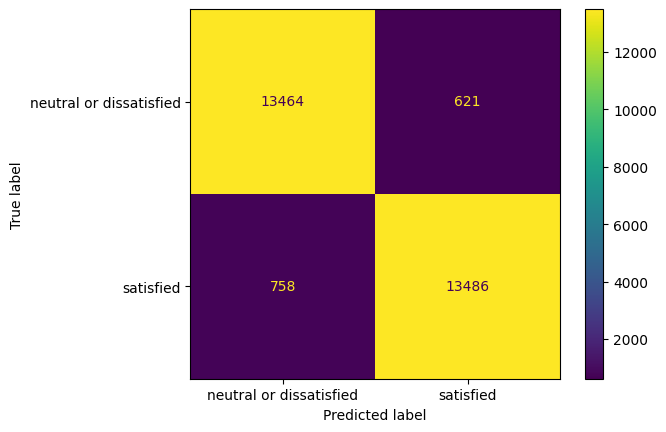

In [183]:
cm_2= confusion_matrix(y_test, y_pred_knn, labels=model_knn.classes_)
disp_2= ConfusionMatrixDisplay(confusion_matrix=cm_2,
                          display_labels=model_knn.classes_)
disp_2.plot()

In [184]:
# ทำ Cross Validation
start_time_cv = time.time()  # เวลาเริ่มต้นสำหรับ cross-validation
cv_scores_knn = cross_val_score(model_knn, X_train, y_train, cv=k_folds, scoring='accuracy')
end_time_cv = time.time()  # เวลาสิ้นสุดสำหรับ cross-validation

# แสดงผล Cross Validation Scores
print(f"Cross Validation Scores (KNN): {cv_scores_knn}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_knn):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_knn):.4f}")

# คำนวณเวลาที่ใช้ในการทำ Cross Validation
cv_time_KNN = end_time_cv - start_time_cv
print(f"เวลาที่ใช้ในการทำ Cross Validation: {cv_time_KNN:.6f} วินาที")


Cross Validation Scores (KNN): [0.95393692 0.9534831  0.95529839 0.94894486 0.95597912 0.95371001
 0.94939868 0.95212162 0.94917177 0.95053324 0.94849104 0.95256468
 0.95733091 0.95120291 0.94893327]
Mean CV Accuracy: 0.9521
Standard Deviation CV Accuracy: 0.0027
เวลาที่ใช้ในการทำ Cross Validation: 9.799565 วินาที


In [185]:
# การประเมินผล
train_accuracy = accuracy_score(y_train, model_knn.predict(X_train))
test_accuracy = accuracy_score(y_test, model_knn.predict(X_test))

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 0.967489145398708
Test Accuracy: 0.9513219668890536


In [186]:
import pickle
pickle_out = open("../model/model_knn.pkl", mode = "wb")
pickle.dump(model_knn, pickle_out)
pickle_out.close()

with open('../model/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

## Load Model Predic

In [187]:
import pickle
df_t = pd.read_csv(f"../datasets/data_{data_name}_eco.csv")
df_sam = df_t.sample(20)
df_sam

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Departure/Arrival time convenient_0,Departure/Arrival time convenient_1,Departure/Arrival time convenient_2,Departure/Arrival time convenient_3,...,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Eco,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
8428,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,1,60,780,0,0.0,neutral or dissatisfied
28312,0,0,1,0,0,0,0,0,1,0,...,0,1,1,0,1,25,868,2,8.0,neutral or dissatisfied
17331,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,1,69,1235,69,72.0,neutral or dissatisfied
52291,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,12,500,0,0.0,satisfied
28514,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,69,364,11,2.0,neutral or dissatisfied
18772,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,1,41,158,17,21.0,neutral or dissatisfied
11569,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,1,65,1607,37,18.0,neutral or dissatisfied
27044,0,0,1,0,0,0,0,0,0,0,...,0,1,1,0,1,51,628,0,0.0,neutral or dissatisfied
17640,0,0,0,0,1,0,0,1,0,0,...,1,0,1,0,1,49,782,31,30.0,satisfied
56821,0,0,1,0,0,0,0,0,1,0,...,0,1,1,0,1,20,1428,0,0.0,neutral or dissatisfied


In [188]:

X_sam= df_sam.iloc[:,:-1]
X_sam


,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Departure/Arrival time convenient_0,Departure/Arrival time convenient_1,Departure/Arrival time convenient_2,Departure/Arrival time convenient_3,...,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Eco,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
8428,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,1,1,60,780,0,0.0
28312,0,0,1,0,0,0,0,0,1,0,...,0,0,1,1,0,1,25,868,2,8.0
17331,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,1,69,1235,69,72.0
52291,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,1,12,500,0,0.0
28514,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,69,364,11,2.0
18772,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,1,41,158,17,21.0
11569,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,1,65,1607,37,18.0
27044,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,1,51,628,0,0.0
17640,0,0,0,0,1,0,0,1,0,0,...,0,1,0,1,0,1,49,782,31,30.0
56821,0,0,1,0,0,0,0,0,1,0,...,0,0,1,1,0,1,20,1428,0,0.0


In [189]:
y_sam = df_sam.iloc[:,-1]
y_sam


8428     neutral or dissatisfied
28312    neutral or dissatisfied
17331    neutral or dissatisfied
52291                  satisfied
28514    neutral or dissatisfied
18772    neutral or dissatisfied
11569    neutral or dissatisfied
27044    neutral or dissatisfied
17640                  satisfied
56821    neutral or dissatisfied
31878    neutral or dissatisfied
11937    neutral or dissatisfied
10587    neutral or dissatisfied
44973                  satisfied
15350    neutral or dissatisfied
12665                  satisfied
47059    neutral or dissatisfied
43084    neutral or dissatisfied
548      neutral or dissatisfied
47831    neutral or dissatisfied
Name: satisfaction, dtype: object

In [190]:
from sklearn.inspection import permutation_importance

model = pickle.load(open("../model/model_knn.pkl", 'rb'))
scaler_1 = pickle.load(open("../model/scaler.pkl", 'rb'))

scaler_new = scaler_1.transform(X_sam)
preds = model.predict(scaler_new)

# # Calculate permutation importance
result = permutation_importance(model, scaler_new, y_sam, n_repeats=10, random_state=42)
print(list(X_sam.columns))

# Create a dataframe with feature importance scores
feature_importance = pd.DataFrame({
    'Feature': list(X_sam.columns),
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

print(feature_importance)
accuracy_KNN=accuracy_score(preds,y_sam)
print(f"Accuracy of Knn is : {round(accuracy_KNN*100,2)} % .")

['Inflight wifi service_0', 'Inflight wifi service_1', 'Inflight wifi service_2', 'Inflight wifi service_3', 'Inflight wifi service_4', 'Inflight wifi service_5', 'Departure/Arrival time convenient_0', 'Departure/Arrival time convenient_1', 'Departure/Arrival time convenient_2', 'Departure/Arrival time convenient_3', 'Departure/Arrival time convenient_4', 'Departure/Arrival time convenient_5', 'Ease of Online booking_0', 'Ease of Online booking_1', 'Ease of Online booking_2', 'Ease of Online booking_3', 'Ease of Online booking_4', 'Ease of Online booking_5', 'Gate location_1', 'Gate location_2', 'Gate location_3', 'Gate location_4', 'Gate location_5', 'Food and drink_0', 'Food and drink_1', 'Food and drink_2', 'Food and drink_3', 'Food and drink_4', 'Food and drink_5', 'Online boarding_0', 'Online boarding_1', 'Online boarding_2', 'Online boarding_3', 'Online boarding_4', 'Online boarding_5', 'Seat comfort_1', 'Seat comfort_2', 'Seat comfort_3', 'Seat comfort_4', 'Seat comfort_5', 'Inf